# EDA of retail transaction dataset

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.rcParams['figure.figsize'] = [16, 8]

In [3]:
data= '../data/dataset01_sfu_hierarchical_forecast_project.csv'
df = pd.read_csv(data,)# index_col='Unnamed: 0')


In [7]:
len(df[df['totalQuantity'] <0]), len(df), df['totalQuantity'].min()

(52103, 2348930, -5.0)

In [5]:
df['time'] = df['year'].astype(str) + " " + df['week'].astype(str) + " 0"
df['time'] = pd.to_datetime(df['time'], format="%Y %W %w")
df = df.set_index(df['time'])
df = df.drop(columns='time')
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales
time,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453
2018-01-07,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227


In [5]:
# Necessary package for determining whether a day falls on a Canadian Federal Holiday.
# !~/anaconda3/bin/conda install workalendar

In [6]:
# !~/anaconda3/bin/conda list
# !which python

In [7]:
# Create label for whether transaction occurred on a holiday week.

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

from workalendar.america import Canada

minyear = df.index.min().year
maxyear = df.index.max().year

dr = pd.date_range(start=str(minyear), end=str(maxyear))

# USFederal Holidays as per calendar
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
holidays_week = holidays.year.astype(str) + " " + holidays.week.astype(str) + " 0"
holidays_week = pd.to_datetime(holidays_week, format="%Y %W %w")
# print(holidays_week)

df['Holiday'] = df.index.isin(holidays_week) # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

# Canadian federal holidays as per `workalender` package
canada = Canada()

# Retrieve holidays for relevant years
can_holiday = []
[can_holiday.extend(canada.holidays(y)) for y in range(minyear, maxyear) ]

can_holiday = np.array(can_holiday)
can_holiday = pd.DataFrame(can_holiday, columns=['Date', 'event'])
# print(can_holiday)

# Convert holidays to Datetime object
can_holiday['Date'] = pd.to_datetime(can_holiday['Date'].astype(str), format="%Y-%M-%d")

# Represent Datetime in (year, week, end of week) format
can_holidays_week = can_holiday.Date.dt.year.astype(str) + " " + can_holiday.Date.dt.week.astype(str) + " 0"
can_holidays_week = pd.to_datetime(can_holidays_week, format="%Y %W %w")

df['Holiday'] = df.index.isin(can_holidays_week) | df['Holiday'] # Create boolean field for whether this transaction occured on a holiday week

# print(df.count(), df['Holiday'].sum())
df

,Unnamed: 0,year,month,week,province,city,store,category,department,class,vendor,size,totalQuantity,totalSales,Holiday
time,,,,,,,,,,,,,,,
2012-01-08,0,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size26,1.0,424.971081,True
2012-01-08,1,2012,1,1,province2,city15,store33,category1,department1,class7,vendor2,size29,-1.0,-424.971081,True
2012-01-08,3,2012,1,1,province1,city18,store51,category1,department1,class7,vendor2,size29,1.0,424.971081,True
2012-01-08,4,2012,1,1,province3,city31,store62,category1,department1,class7,vendor2,size29,1.0,424.971081,True
2012-01-08,5,2012,1,1,province3,city31,store40,category1,department1,class7,vendor2,size33,1.0,424.971081,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-07,2639097,2018,1,1,province2,city12,store31,category2,department12,class41,vendor11,size1,2.0,85.708453,True
2018-01-07,2639098,2018,1,1,province1,city39,store43,category2,department12,class41,vendor11,size1,2.0,85.708453,True
2018-01-07,2639099,2018,1,1,province1,city23,store56,category2,department12,class41,vendor11,size1,1.0,42.854227,True


In [8]:
df.to_csv('../data/dataset-02.csv')

     year  week    totalSales
0    2012     1  1.538880e+06
1    2012     2  2.752834e+06
2    2012     3  2.848950e+06
3    2012     4  2.283498e+06
4    2012     5  2.405334e+06
..    ...   ...           ...
308  2017    49  2.739610e+06
309  2017    50  2.646425e+06
310  2017    51  3.107577e+06
311  2017    52  2.937096e+06
312  2018     1  1.012332e+06

[313 rows x 3 columns]


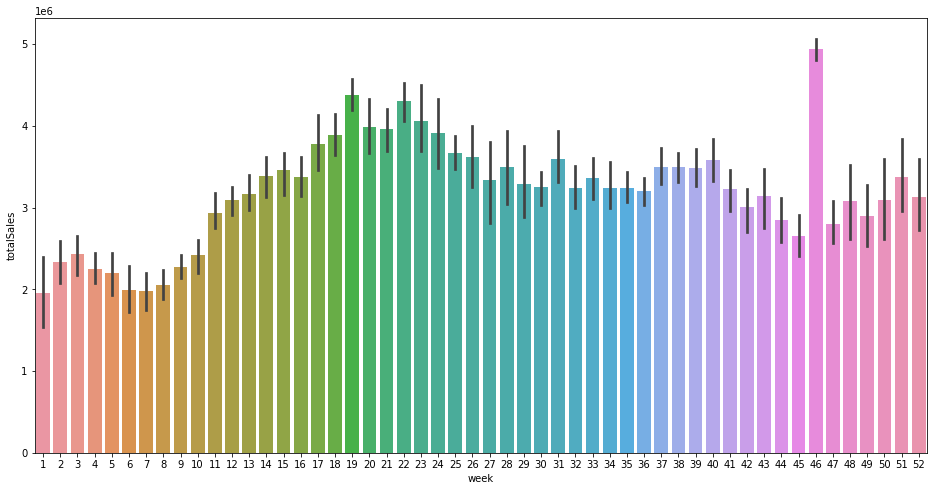

In [9]:
yw = df.groupby(['year','week']).agg({'totalSales':'sum'})
yw = yw.reset_index()
print(yw)

# plt.bar(x='week', height='totalSales', data=yw);
# sns.barplot(x='week', y='totalSales', data = yw);
sns.barplot(x='week', y='totalSales', data = yw);

## *spatial* hierarchy

In [65]:
# spatial hierarchy

grouped = df.groupby(['province', 'city', 'store'])
print(df['province'].unique())
print(sorted(df[df['province'] == 'province1']['city'].unique()))
print(sorted(df[df['province'] == 'province2']['city'].unique()))
print(sorted(df[df['province'] == 'province3']['city'].unique()))

def extract_space(df, province=False, city=False):
#     province = sorted(province) if province else None
#     city = sorted(city) if city else None
#     store = sorted(store) if store else None
    
    ts = {}
    if province:
        provinces = sorted(df['province'].unique())
        for p in provinces:
            if p:
                ts.update({ p : 
                          sorted(df[df['province'] == p]['city'].unique())})
                if city:
                    cities = sorted(df[df['province'] == p]['city'].unique())
                    for c in cities:
                        ts.update({ c : sorted(df[(df['province'] == p) & 
                                            (df['city'] == c)]['store'].unique())})
    return ts

ts = extract_space(df, province=True, city=True)

[print(k,len(v)) for k,v in ts.items()]
ts


['province3' 'province2' 'province1']
['city11', 'city13', 'city18', 'city20', 'city23', 'city3', 'city30', 'city35', 'city37', 'city38', 'city39', 'city45']
['city10', 'city12', 'city14', 'city15', 'city16', 'city19', 'city2', 'city21', 'city22', 'city25', 'city26', 'city27', 'city28', 'city29', 'city32', 'city36', 'city4', 'city41', 'city42', 'city43', 'city44', 'city46', 'city48', 'city5', 'city6', 'city7', 'city8', 'city9']
['city31', 'city33', 'city40', 'city49']
province1 12
city11 2
city13 1
city18 1
city20 1
city23 1
city3 1
city30 1
city35 1
city37 1
city38 1
city39 1
city45 1
province2 28
city10 1
city12 1
city14 2
city15 2
city16 1
city19 1
city2 1
city21 1
city22 1
city25 1
city26 1
city27 1
city28 1
city29 1
city32 1
city36 1
city4 5
city41 1
city42 1
city43 1
city44 3
city46 1
city48 1
city5 1
city6 1
city7 1
city8 1
city9 1
province3 4
city31 4
city33 2
city40 1
city49 1


{'province1': ['city11',
  'city13',
  'city18',
  'city20',
  'city23',
  'city3',
  'city30',
  'city35',
  'city37',
  'city38',
  'city39',
  'city45'],
 'city11': ['store47', 'store57'],
 'city13': ['store41'],
 'city18': ['store51'],
 'city20': ['store60'],
 'city23': ['store56'],
 'city3': ['store53'],
 'city30': ['store49'],
 'city35': ['store45'],
 'city37': ['store48'],
 'city38': ['store50'],
 'city39': ['store43'],
 'city45': ['store52'],
 'province2': ['city10',
  'city12',
  'city14',
  'city15',
  'city16',
  'city19',
  'city2',
  'city21',
  'city22',
  'city25',
  'city26',
  'city27',
  'city28',
  'city29',
  'city32',
  'city36',
  'city4',
  'city41',
  'city42',
  'city43',
  'city44',
  'city46',
  'city48',
  'city5',
  'city6',
  'city7',
  'city8',
  'city9'],
 'city10': ['store12'],
 'city12': ['store31'],
 'city14': ['store29', 'store37'],
 'city15': ['store33', 'store38'],
 'city16': ['store2'],
 'city19': ['store7'],
 'city2': ['store14'],
 'city21': ['st

## *product* hierarchy

In [70]:
# product hierarchy

grouped = df.groupby(['category', 'department', 'class'])
print(df['category'].unique())
print(sorted(df[df['category'] == 'category1']['department'].unique()))
print(sorted(df[df['province'] == 'category2']['department'].unique()))

def extract_product(df, cat=False, dept=False):
#     province = sorted(province) if province else None
#     city = sorted(city) if city else None
#     store = sorted(store) if store else None
    
    ts = {}
    if cat:
        categories = sorted(df['category'].unique())
        for c in categories:
            if c:
                ts.update({ c : 
                          sorted(df[df['category'] == c]['department'].unique())})
                if dept:
                    departments = sorted(df[df['category'] == c]['department'].unique())
                    for d in departments:
                        ts.update({ d : sorted(df[(df['category'] == c) & 
                                            (df['department'] == d)]['class'].unique())})
    return ts

ts = extract_product(df, cat=True, dept=True)

[print(k,len(v)) for k,v in ts.items()]
ts

['category1' 'category2']
['department1', 'department2', 'department3', 'department4', 'department5', 'department6', 'department7']
[]
category1 7
department1 3
department2 6
department3 6
department4 1
department5 2
department6 1
department7 2
category2 7
department10 2
department11 8
department12 6
department13 2
department14 1
department8 3
department9 1


{'category1': ['department1',
  'department2',
  'department3',
  'department4',
  'department5',
  'department6',
  'department7'],
 'department1': ['class14', 'class15', 'class7'],
 'department2': ['class1', 'class2', 'class3', 'class4', 'class5', 'class6'],
 'department3': ['class10',
  'class11',
  'class12',
  'class13',
  'class8',
  'class9'],
 'department4': ['class16'],
 'department5': ['class17', 'class18'],
 'department6': ['class19'],
 'department7': ['class20', 'class21'],
 'category2': ['department10',
  'department11',
  'department12',
  'department13',
  'department14',
  'department8',
  'department9'],
 'department10': ['class26', 'class35'],
 'department11': ['class27',
  'class28',
  'class29',
  'class30',
  'class31',
  'class32',
  'class33',
  'class34'],
 'department12': ['class36',
  'class37',
  'class38',
  'class39',
  'class40',
  'class41'],
 'department13': ['class42', 'class43'],
 'department14': ['class44'],
 'department8': ['class22', 'class23', 'cla